# Los límites de las redes neuronales

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.0 MB/s 
     |████████████████████████████████| 186 kB 41.2 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 313 kB/s 
Mounted at /content/gdrive


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import fastai.tabular.all as ft
import random
from math import sin,cos,tan,log,exp

In [48]:
class RealFuncDataset:
    def __init__(self, a, b, c, d, f, n=1024*16):
        self.a,self.b, self.c,self.d = a,b,c,d
        self.f = f
        self.n = n
        
    def __len__(self):
        return self.n
    
    def __getitem__(self,i):
        a,b,c,d, f = self.a, self.b, self.c, self.d, self.f
        #Aleatoriamente elige uno de los dos intervalos.
        if random.random() <= .5:
          x = random.uniform(a,b)
        else:
          x = random.uniform(c,d)
        # print(x)
        return torch.tensor([x],dtype=torch.float32),torch.tensor([f(x)],dtype=torch.float32)

In [49]:
a,b = -5,-2
c,d = 2,5
f = np.sin

In [50]:
tmp =  RealFuncDataset(a,b,c,d,f)

In [52]:
dls = ft.DataLoaders.from_dsets(RealFuncDataset(a,b,c,d,f), RealFuncDataset(a,b,c,d,f))
#Los junta en un batch
#Conoce el tamaño del batch

In [61]:
ft.DataLoaders.from_dsets??

In [ ]:
dls.one_batch()

In [55]:
class Shaper(nn.Module):
    def __init__(self, c):
        super().__init__()
        self.c = c
    def forward(self, x):
        return x.view(-1,self.c).float()

In [56]:
model = nn.Sequential(
    Shaper(1),
    nn.Linear(1,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256,1)
)

In [57]:
learn = ft.Learner(dls,model,loss_func=ft.MSELossFlat(),opt_func=ft.ranger)

In [58]:
learn.fit_one_cycle(10,div=1,pct_start=0.5)

epoch,train_loss,valid_loss,time
0,0.022573,0.013832,00:06
1,0.018670,0.004974,00:05
2,0.021030,0.001755,00:05
3,0.017953,0.043077,00:05
4,0.020099,0.013380,00:05
5,0.015501,0.003264,00:06
6,0.016125,0.018594,00:05
7,0.012098,0.003043,00:05
8,0.012366,0.001914,00:05
9,0.010871,0.004711,00:05


In [62]:
learn.model.eval().cpu()

Sequential(
  (0): Shaper()
  (1): Linear(in_features=1, out_features=256, bias=True)
  (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=256, bias=True)
  (8): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Linear(in_features=256, out_features=256, bias=True)
  (11): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): Linear(in_features=256, out_features=1, bias=True)
)

In [63]:
x = torch.linspace(a,d,100)

In [64]:
yp = learn.model(x)

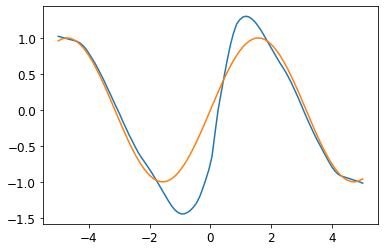

In [65]:
x,yp = x.detach().numpy(), yp.detach().numpy()
y = f(x)
plt.plot(x,yp)
plt.plot(x,y)
plt.show()

En el intervalo (-2,2) no tenemos datos para entrenar la red, por lo que se trata de ajustar, pero las predicciones no son buenas